In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima.arima import auto_arima

import sys
sys.path.append('/Users/macbook/Desktop/projects/Github_Repositories/cfa_binance/docs')
from config import path_data_raw, path_data_proceed

import warnings
warnings.filterwarnings("ignore")

%load_ext autotime

In [2]:
# Assets dataframe
df_assets = pd.DataFrame({'id_asset' : [1,2,3],
                         'name' : ['BTCUSDT', 'ETHBTC', 'ETHUSDT']})
df_assets

,id_asset,name
0,1,BTCUSDT
1,2,ETHBTC
2,3,ETHUSDT


time: 32.6 ms


In [3]:
# Read Daily Data and select Asset 1 

df_all = pd.read_csv(f'{path_data_raw}/All_2017_01_01_to_2023_07_06_daily.csv')
df = df_all.loc[df_all.id_asset == 1]
df.index = df['timestamp']
df.tail(3)

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2023-07-04,1,2023-07-04,31156.20,31350.69,30620.0,30766.51,33206.11943,2023-07-04 23:59:59.999,1.028794e+09,779472,14107.36566,4.371262e+08,0.0
2023-07-05,1,2023-07-05,30766.52,30878.07,30200.0,30504.81,33215.67122,2023-07-05 23:59:59.999,1.013695e+09,827926,15619.11716,4.764783e+08,0.0
2023-07-06,1,2023-07-06,30504.80,30787.42,30327.0,30786.57,7543.32988,2023-07-06 23:59:59.999,2.305300e+08,211108,3843.67783,1.174872e+08,0.0


time: 138 ms


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2150 entries, 2017-08-17 to 2023-07-06
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_asset                      2150 non-null   int64  
 1   timestamp                     2150 non-null   object 
 2   open                          2150 non-null   float64
 3   high                          2150 non-null   float64
 4   low                           2150 non-null   float64
 5   close                         2150 non-null   float64
 6   volume                        2150 non-null   float64
 7   close_time                    2150 non-null   object 
 8   quote_asset_volume            2150 non-null   float64
 9   number_of_trades              2150 non-null   int64  
 10  taker_buy_base_asset_volume   2150 non-null   float64
 11  taker_buy_quote_asset_volume  2150 non-null   float64
 12  ignore                        2150 non-null   float6

In [5]:
df.describe()

,id_asset,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,2150.0,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2.150000e+03,2.150000e+03,2150.000000,2.150000e+03,2150.0
mean,1.0,19955.062670,20496.945186,19346.460953,19967.468177,76534.984800,1.669060e+09,1.471728e+06,38085.349543,8.272225e+08,0.0
std,0.0,16118.247915,16555.493433,15614.066055,16116.443866,87120.219748,2.122683e+09,2.067787e+06,43329.813491,1.054215e+09,0.0
min,1.0,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05,0.0
25%,1.0,7550.220000,7772.515000,7360.250000,7581.007500,31176.460952,2.631653e+08,2.772438e+05,15741.815947,1.356583e+08,0.0
50%,1.0,11520.950000,11824.950000,11220.000000,11527.580000,48277.282356,7.142532e+08,7.460605e+05,24049.637912,3.477425e+08,0.0
75%,1.0,29471.602500,30372.917500,28830.657500,29497.400000,81847.544089,2.451705e+09,1.607833e+06,40430.130485,1.212030e+09,0.0
max,1.0,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


time: 76.6 ms


In [6]:
df.isna().sum()

id_asset                        0
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

time: 12.9 ms


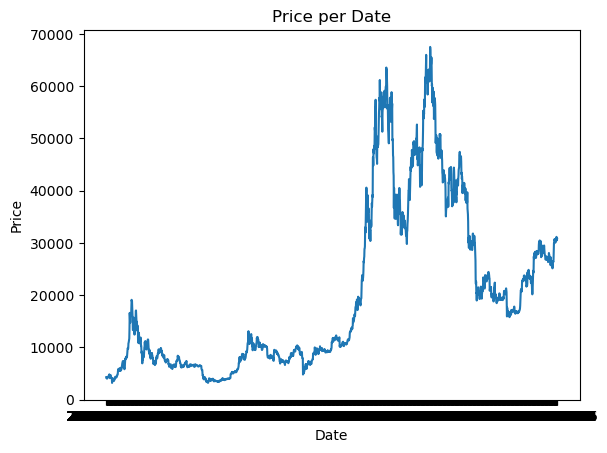

time: 17.8 s


In [7]:
# Plot 01- Close Price

plt.plot(df.index, df['close'])
plt.title('Price per Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

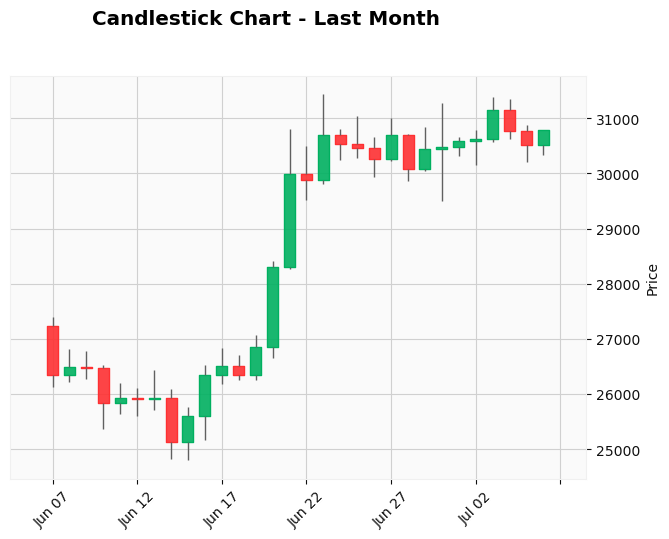

time: 483 ms


In [8]:
# Please add an Candle stick diyagram for last month 
# Select the last month of data
last_month_df = df.iloc[-30:]
# Convert the index to DatetimeIndex
last_month_df.index = pd.to_datetime(last_month_df.index)
# Create the candlestick chart
mpf.plot(last_month_df, type='candle', style='yahoo', title='Candlestick Chart - Last Month')
# Display the chart
plt.show() 

In [9]:
# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]

1935 215


[4285.08, 4108.37, 4139.98, 4086.29, 4016.0]

time: 8.66 ms


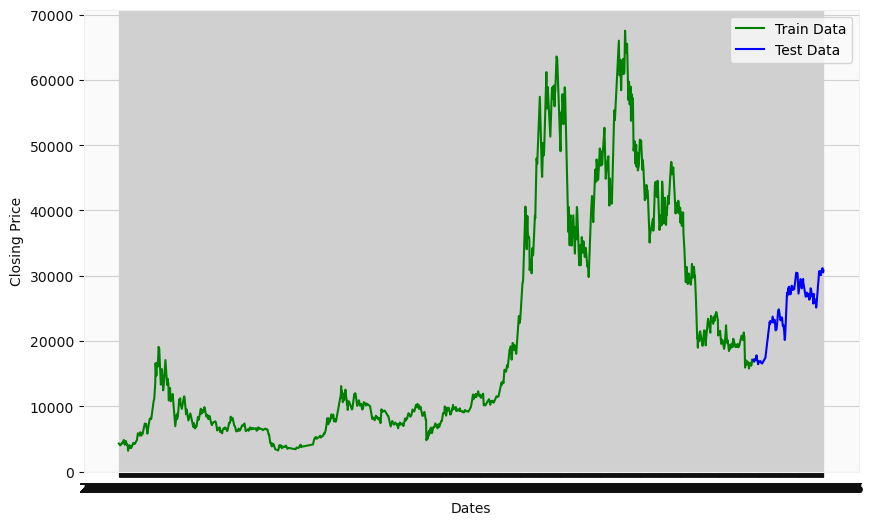

time: 20.7 s


In [10]:
# Plot 02 - splited data into a train and training set

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

# Model Prediction with ARIMA

In [11]:
# Model Predictin with ARIMA
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)   # ==> Add actual value to train data , we need to append the value for forecasting the next day 
    n+=1
    
    if n % 10 == 0:
        print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')

10 ,yhat = 17202.608851145196 , actual value = 17774.7
20 ,yhat = 16823.506070054198 , actual value = 16778.5
30 ,yhat = 16616.151858651065 , actual value = 16672.87
40 ,yhat = 17932.9496189584 , actual value = 18846.62
50 ,yhat = 22777.16394154985 , actual value = 22707.88
60 ,yhat = 23130.350301482413 , actual value = 23732.66
70 ,yhat = 21637.782564110817 , actual value = 21862.55
80 ,yhat = 24855.886020794755 , actual value = 24452.16
90 ,yhat = 23460.413966974633 , actual value = 22354.34
100 ,yhat = 21901.95848470125 , actual value = 24113.48
110 ,yhat = 27304.662254762792 , actual value = 28295.41
120 ,yhat = 28479.05533031391 , actual value = 28171.87
130 ,yhat = 30196.65936909656 , actual value = 29888.07
140 ,yhat = 27280.7269908064 , actual value = 27816.85
150 ,yhat = 28098.97609911332 , actual value = 28669.86
160 ,yhat = 26965.40847738818 , actual value = 26795.01
170 ,yhat = 26744.468550195063 , actual value = 26849.27
180 ,yhat = 27252.41962962726 , actual value = 26817

# Model Summary

In [12]:
# Print Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2149
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -17812.222
Date:                Thu, 06 Jul 2023   AIC                          35634.444
Time:                        09:51:54   BIC                          35662.805
Sample:                             0   HQIC                         35644.820
                               - 2149                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0334      0.014     -2.440      0.015      -0.060      -0.007
ar.L2          0.0051      0.013      0.379      0.705      -0.021       0.031
ar.L3          0.0259      0.014      1.822      0.0

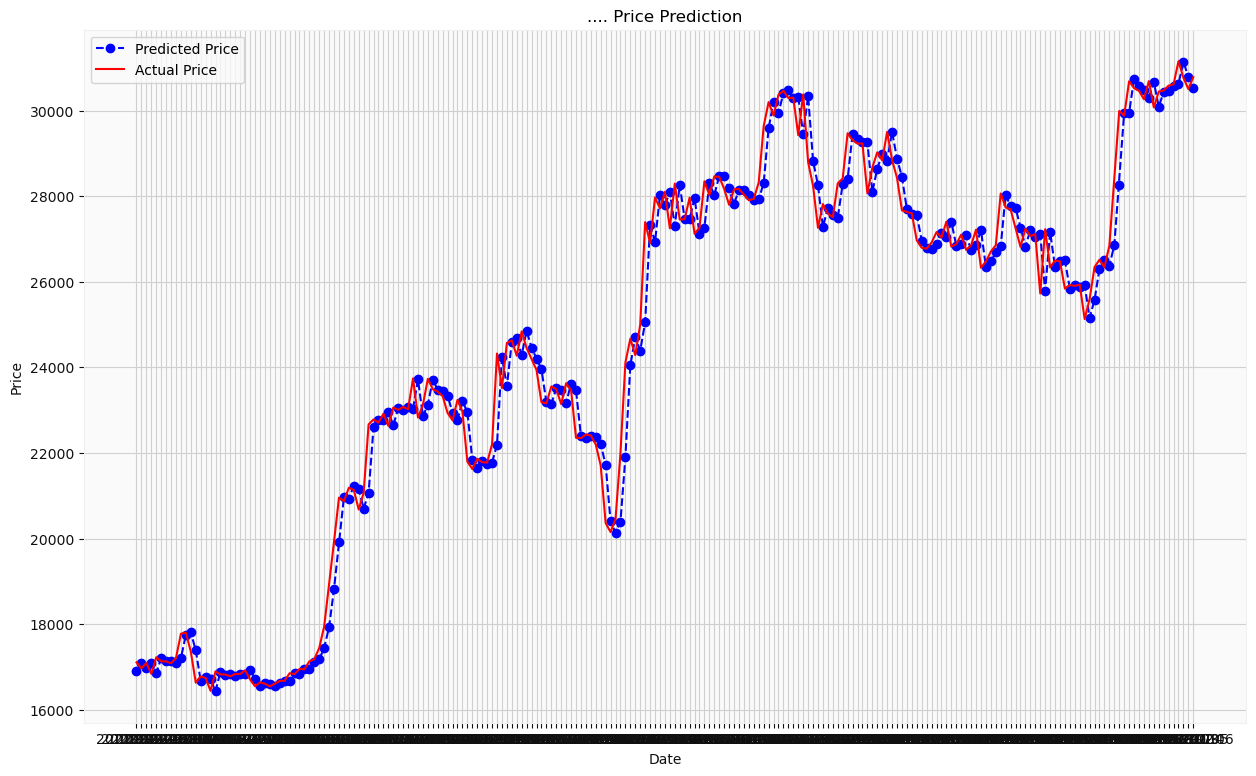

time: 2.64 s


In [13]:
# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.64% MAPE ==> The model is 98.36% accurate in predicting the test set observation.

MAPE : 0.016477830484926504
time: 2.26 ms


In [15]:
# Model Score  AIC, BIC
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)

AIC: 35634.44399722917
BIC: 35662.80545950732
time: 1.04 ms


# Model Tunning

In [16]:
train_df = df[0:]['close']
train_data = list(train_df)

time: 5.14 ms


In [17]:
model_tunned = auto_arima(train_data) 
model_tunned

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

time: 34.4 s


In [18]:
# Model Score  AIC, BIC
print("AIC:", model_tunned.aic())
print("BIC:", model_tunned.bic())

AIC: 35631.41798460676
BIC: 35671.127289883254
time: 3.16 ms


In [19]:
# Print Model Summary
print(model_tunned.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2150
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -17808.709
Date:                Thu, 06 Jul 2023   AIC                          35631.418
Time:                        09:54:38   BIC                          35671.127
Sample:                             0   HQIC                         35645.945
                               - 2150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.7097     52.520      0.204      0.838     -92.227     113.646
ar.L1         -0.4761      0.016    -29.382      0.000      -0.508      -0.444
ar.L2         -0.9646      0.012    -81.424      0.0

# Save data

In [20]:
df_daily_all = df_all[['timestamp', 'id_asset', 'close']]
df_daily_all.to_csv(f"{path_data_proceed}/daily_proceed_all.csv", index=False)

time: 46.2 ms
